In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

#Cargando los datos

In [2]:
d=pd.read_excel('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/bookings.xlsx', 
                index_col=0, 
                parse_dates=True)
d

,Bookings
Date,
2006-01-01,383
2006-02-01,366
2006-03-01,250
2006-04-01,318
2006-05-01,334
...,...
2015-08-01,18478
2015-09-01,12004
2015-10-01,9789


In [3]:
d['Bookings']

Date
2006-01-01      383
2006-02-01      366
2006-03-01      250
2006-04-01      318
2006-05-01      334
              ...  
2015-08-01    18478
2015-09-01    12004
2015-10-01     9789
2015-11-01    10003
2015-12-01    13304
Name: Bookings, Length: 120, dtype: int64

#Graficando la serie temporal para una primera inspeccion

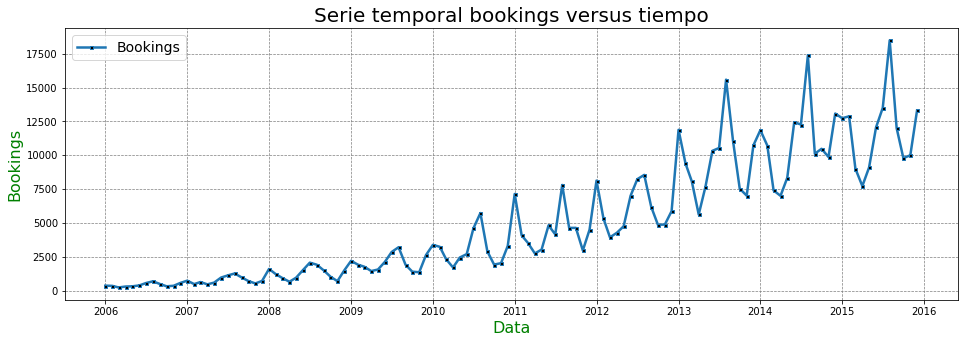

In [4]:
plt.figure(figsize=(16,5))
plt.plot(d,linestyle='-', label='Bookings', linewidth=2.5,marker='s', markersize=3,markerfacecolor='black')
plt.legend(fontsize=14, loc='best')
plt.grid(linewidth=0.7, color='grey', linestyle='dashed')
plt.xlabel('Data', color='green', fontsize=16)
plt.ylabel('Bookings',color='green', fontsize=16)
plt.title('Serie temporal bookings versus tiempo', fontsize=20)
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/graicando la serie temporal.png')
plt.show()

#Detectando la existencia o no de tendencia en la serie temporal

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter #importando la bibioteca statsmodel

In [6]:
bookings_cycle, bookings_trend=hpfilter(d['Bookings'], lamb=1600) 
#aqui lo que esto haciendo es separando los eectos del ciclo de los eectos de la tendencia

#Graficando la tendencia de la serie temporal

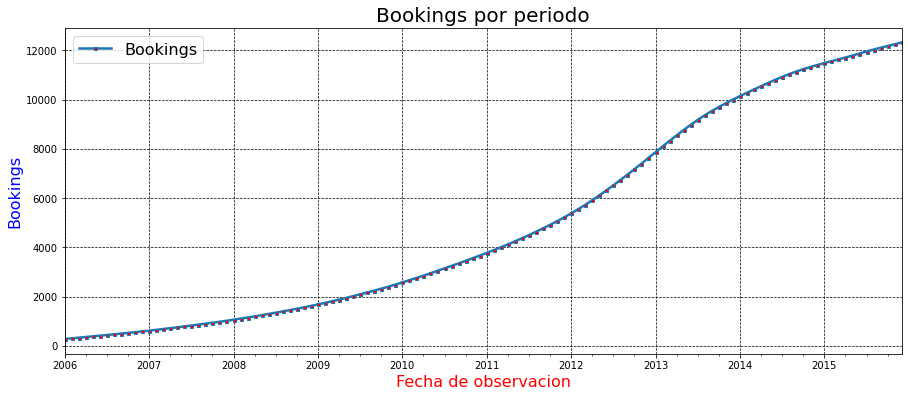

In [7]:
bookings_trend.plot(figsize=(15,6), linestyle='-', linewidth=2.5, label='Bookings', marker='s'
                    , markersize=3, markerfacecolor='red')
plt.legend(loc='best', fontsize=16)
plt.title('Bookings por periodo', fontsize=20)
plt.xlabel('Fecha de observacion', color='red', fontsize=16)
plt.ylabel('Bookings', color='blue', fontsize=16)
plt.grid(color='black',linewidth=0.7, linestyle='dashed')
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/trend.png')

##Ahora lo que hago es retirar el efecto de la tendencia de la serie temporal para ulteriores analisis. Esto lo puedo hacer por tres metodos diferentes como vamos a ver mas adelante:

DETRENDING USING PANDAS DIFFERENCING

In [8]:
detrending1=pd.read_excel('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/bookings.xlsx', 
                index_col=0, 
                parse_dates=True)

In [9]:
import warnings

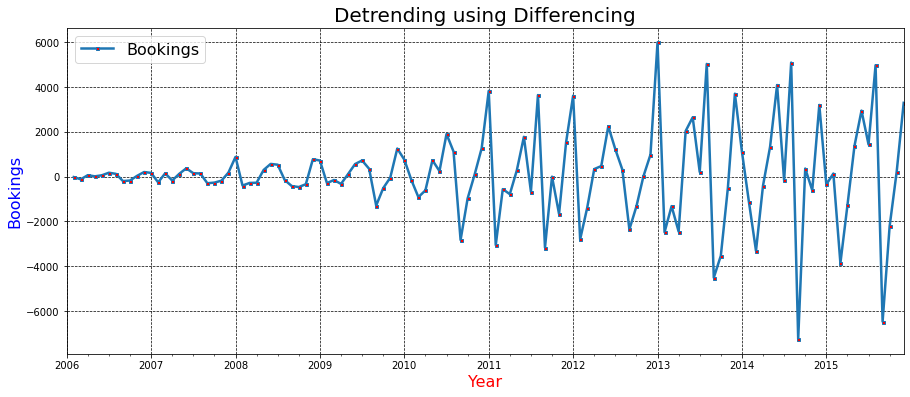

In [10]:
diff=detrending1['Bookings'].diff()
diff.plot(figsize=(15,6), linestyle='-', linewidth=2.5, label='Bookings', marker='s'
                    , markersize=3, markerfacecolor='red')
plt.legend(loc='best', fontsize=16)
plt.title('Detrending using Differencing', fontsize=20)
plt.xlabel('Year', color='red', fontsize=16)
plt.ylabel('Bookings', color='blue', fontsize=16)
plt.grid(color='black',linewidth=0.7, linestyle='dashed')
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/detrending with pandas differencing.png')

DETRENDING USANDO SciPy Signal

In [11]:
from scipy import signal

In [12]:
detrending2=pd.read_excel('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/bookings.xlsx', 
                index_col=0, 
                parse_dates=True)

In [13]:
warnings.filterwarnings("ignore")

In [14]:
detrened=signal.detrend(detrending2['Bookings'].values)

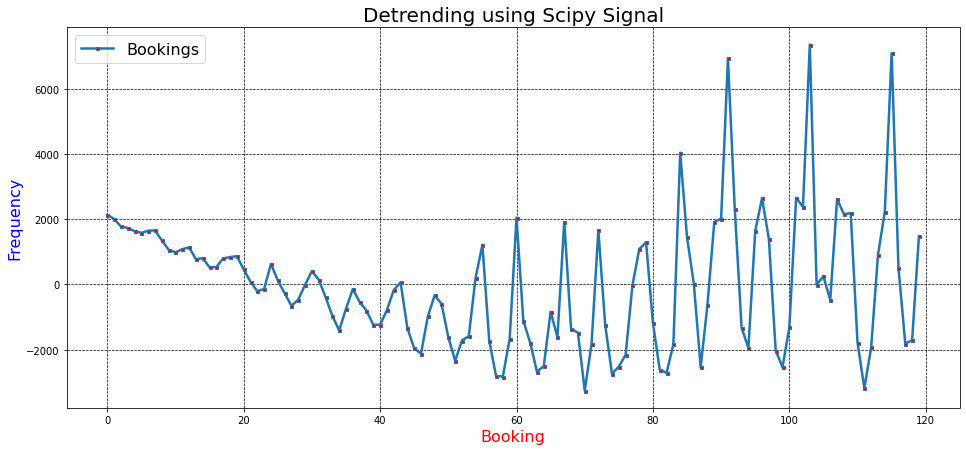

In [15]:
plt.figure(figsize=(16,7))
plt.plot(detrened, linestyle='-', linewidth=2.5, label='Bookings', marker='s'
                    , markersize=3, markerfacecolor='red')
plt.legend(loc='best', fontsize=16)
plt.title('Detrending using Scipy Signal', fontsize=20)
plt.xlabel('Booking', color='red', fontsize=16)
plt.ylabel('Frequency', color='blue', fontsize=16)
plt.grid(color='black',linewidth=0.7, linestyle='dashed')
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/detrending with SciPy Signal.png')

DETRENDING USANDO HP Filter

In [16]:
d['Trend']=bookings_trend

In [17]:
detrending3=d['Bookings']-d['Trend']

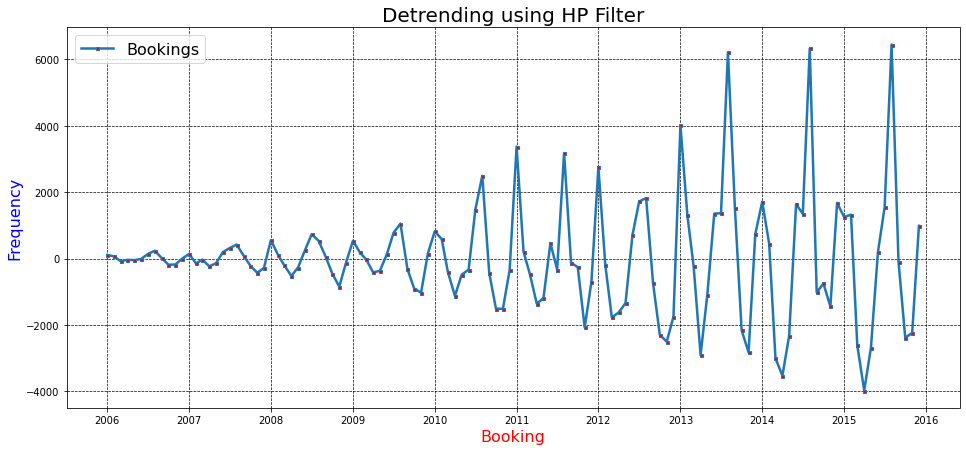

In [18]:
plt.figure(figsize=(16,7))
plt.plot(detrending3, linestyle='-', linewidth=2.5, label='Bookings', marker='s'
                    , markersize=3, markerfacecolor='red')
plt.legend(loc='best', fontsize=16)
plt.title('Detrending using HP Filter', fontsize=20)
plt.xlabel('Booking', color='red', fontsize=16)
plt.ylabel('Frequency', color='blue', fontsize=16)
plt.grid(color='black',linewidth=0.7, linestyle='dashed')
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/Detrending using HP Filter.png')

#Seasonality

#DETECTANDO SEASONALITY

In [19]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import dateutil

In [20]:
d_season=pd.read_excel('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/bookings.xlsx')
d_season['Date']=pd.to_datetime(d_season['Date'])
d_season.dtypes

Date        datetime64[ns]
Bookings             int64
dtype: object

In [21]:
d_season

,Date,Bookings
0,2006-01-01,383
1,2006-02-01,366
2,2006-03-01,250
3,2006-04-01,318
4,2006-05-01,334
...,...,...
115,2015-08-01,18478
116,2015-09-01,12004
117,2015-10-01,9789
118,2015-11-01,10003


In [22]:
d_season['Date']

0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
115   2015-08-01
116   2015-09-01
117   2015-10-01
118   2015-11-01
119   2015-12-01
Name: Date, Length: 120, dtype: datetime64[ns]

In [28]:
d_season['month']=d_season['Date'].dt.strftime('%b')
d_season['year']=[d.year for d in d_season['Date']]
d_season['month']=[d.strftime('%b') for d in d_season['Date']]
years=d_season['year'].unique()

No handles with labels found to put in legend.


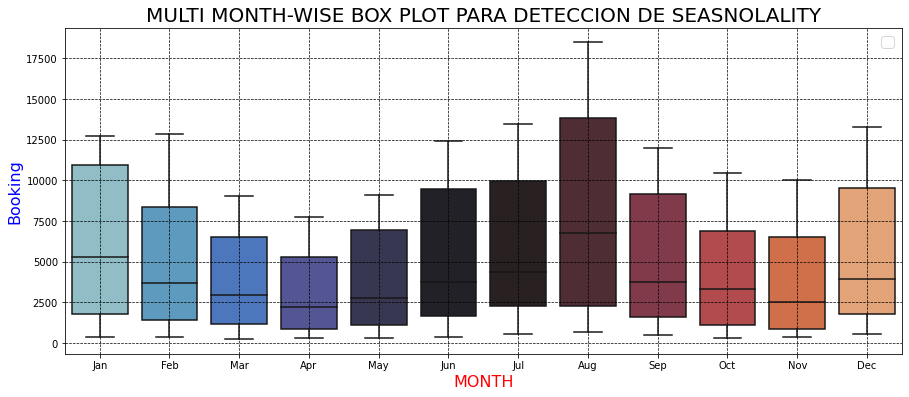

In [37]:
plt.figure(figsize=(15,6))
sn.boxplot(x=d_season['month'], y=d_season['Bookings'],palette='icefire')
plt.legend(loc='best', fontsize=16)
plt.title('MULTI MONTH-WISE BOX PLOT PARA DETECCION DE SEASNOLALITY', fontsize=20)
plt.xlabel('MONTH', color='red', fontsize=16)
plt.ylabel('Booking', color='blue', fontsize=16)
plt.grid(color='black',linewidth=0.7, linestyle='dashed')
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/'
            'MULTI MONTH-WISE BOX PLOT PARA DETECCION DE SEASNOLALITY.png')

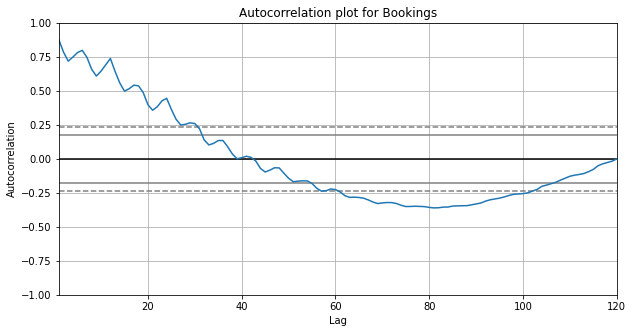

In [41]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(d_season['Bookings'].tolist())
plt.title('Autocorrelation plot for Bookings')
plt.savefig('C:/Users/ALEJANDRO/Desktop/ETS_com_livro/'
            'Autocorrelation plot for seasonality detect.png')